**Loan Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Decision Tree

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/loan_approval_dataset.csv')
df1.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df1.duplicated().sum()/len(df1) * 100 #checking for duplicates

0.0

In [ ]:
df1.isnull().sum()/len(df1) * 100 #checking for null values

loan_id                      0.0
 no_of_dependents            0.0
 education                   0.0
 self_employed               0.0
 income_annum                0.0
 loan_amount                 0.0
 loan_term                   0.0
 cibil_score                 0.0
 residential_assets_value    0.0
 commercial_assets_value     0.0
 luxury_assets_value         0.0
 bank_asset_value            0.0
 loan_status                 0.0
dtype: float64

In [ ]:
# Remove leading whitespaces from column names
df1.columns = df1.columns.str.strip()

In [ ]:
print(df1.columns) #printing column names

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


Label Encoding the categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['education'] = le.fit_transform(df1['education'])
df1['self_employed'] = le.fit_transform(df1['self_employed'])
df1['loan_status'] = le.fit_transform(df1['loan_status'])
df1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
X = df1.iloc[:, :-1]  # Selects all columns except the last one
y = df1.iloc[:, -1].values    # Selects the last column


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf=5) # criterion = 'entropy'
# The maximum depth of the tree.
# If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# The minimum number of samples required to be at a leaf node.
# criterion = {“gini”, “entropy”, “log_loss”}, default=”gini”
dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc)


Confusion Matrix:
[[998  65]
 [  6 639]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1063
           1       0.91      0.99      0.95       645

    accuracy                           0.96      1708
   macro avg       0.95      0.96      0.96      1708
weighted avg       0.96      0.96      0.96      1708


Accuracy: 0.9584309133489461


##Using bagging classifier

In [ ]:
#Train a machine learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth=3,random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [ ]:
# Bagging Classifier
#improve the model performance by increasing n_estimators 50
from sklearn.ensemble import BaggingClassifier

# Create a bagging classifier with the decision tree pipeline
bagging_classifier = BaggingClassifier(base_estimator=pipeline, n_estimators=50, random_state=42)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('classifier',
                                                  DecisionTreeClassifier(max_depth=3,
                                                                         random_state=42))]),
                  n_estimators=50, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(), X, y,cv=5) #using cross validation to assess the performance of the decision tree classifier.

array([0.96604215, 0.97540984, 0.98360656, 0.97189696, 0.96834701])

In [ ]:
# Evaluate the classifier using cross-validation
cv_scores = cross_val_score(bagging_classifier, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-validation scores: [0.96370023 0.96135831 0.96604215 0.96018735 0.96014068]
Mean CV accuracy: 0.96


In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1040
           1       0.99      0.93      0.96       668

    accuracy                           0.97      1708
   macro avg       0.97      0.96      0.97      1708
weighted avg       0.97      0.97      0.97      1708



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc)


Confusion Matrix:
[[1033   45]
 [   7  623]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1078
           1       0.93      0.99      0.96       630

    accuracy                           0.97      1708
   macro avg       0.96      0.97      0.97      1708
weighted avg       0.97      0.97      0.97      1708


Accuracy: 0.9695550351288056


In [ ]:
# Make predictions on the training set
y_train_pred = pipeline.predict(X_train)

# Make predictions on the test set
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9609527528309254
Test Accuracy: 0.9695550351288056


------------------------------------
## Performing Grid Search cross-validation


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=8, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 8 folds for each of 50 candidates, totalling 400 fits
CPU times: user 370 ms, sys: 21.3 ms, total: 391 ms
Wall time: 6.47 s


GridSearchCV(cv=8,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024490,0.008020,0.006570,0.002645,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.959502,0.959375,0.95625,0.94375,0.978125,0.953125,0.95,0.959375,0.957438,0.00937,27
1,0.018491,0.004398,0.009074,0.002917,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.959502,0.959375,0.95625,0.94375,0.978125,0.953125,0.95,0.959375,0.957438,0.00937,27
2,0.019955,0.003737,0.006233,0.003013,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.959502,0.959375,0.95625,0.94375,0.978125,0.953125,0.95,0.959375,0.957438,0.00937,27
3,0.019257,0.004041,0.007179,0.002529,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.959502,0.959375,0.95625,0.94375,0.978125,0.953125,0.95,0.959375,0.957438,0.00937,27
4,0.017885,0.003648,0.007412,0.003391,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.959502,0.959375,0.95625,0.94375,0.978125,0.953125,0.95,0.959375,0.957438,0.00937,27


In [ ]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
40,0.024271,0.003834,0.007114,0.004415,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.965732,0.984375,0.978125,0.96875,0.98125,0.971875,0.965625,0.96875,0.973060,0.006785,1
15,0.022790,0.004923,0.007717,0.004804,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.975078,0.981250,0.965625,0.96250,0.98750,0.968750,0.956250,0.97500,0.971494,0.009564,2
16,0.024545,0.006723,0.005933,0.003219,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.962617,0.971875,0.965625,0.96875,0.98750,0.971875,0.959375,0.98125,0.971108,0.008790,3
21,0.025880,0.002961,0.005539,0.002925,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.962617,0.971875,0.965625,0.96875,0.98750,0.971875,0.959375,0.98125,0.971108,0.008790,3
41,0.026473,0.003524,0.006538,0.003790,entropy,10,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.965732,0.971875,0.965625,0.97500,0.98125,0.975000,0.959375,0.97500,0.971107,0.006572,5


In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.9828192112456072
Train Confusion Matrix:
[[1575    3]
 [  41  942]]
--------------------------------------------------
Test Accuracy : 0.9771662763466042
Test Confusion Matrix:
[[1067   11]
 [  28  602]]


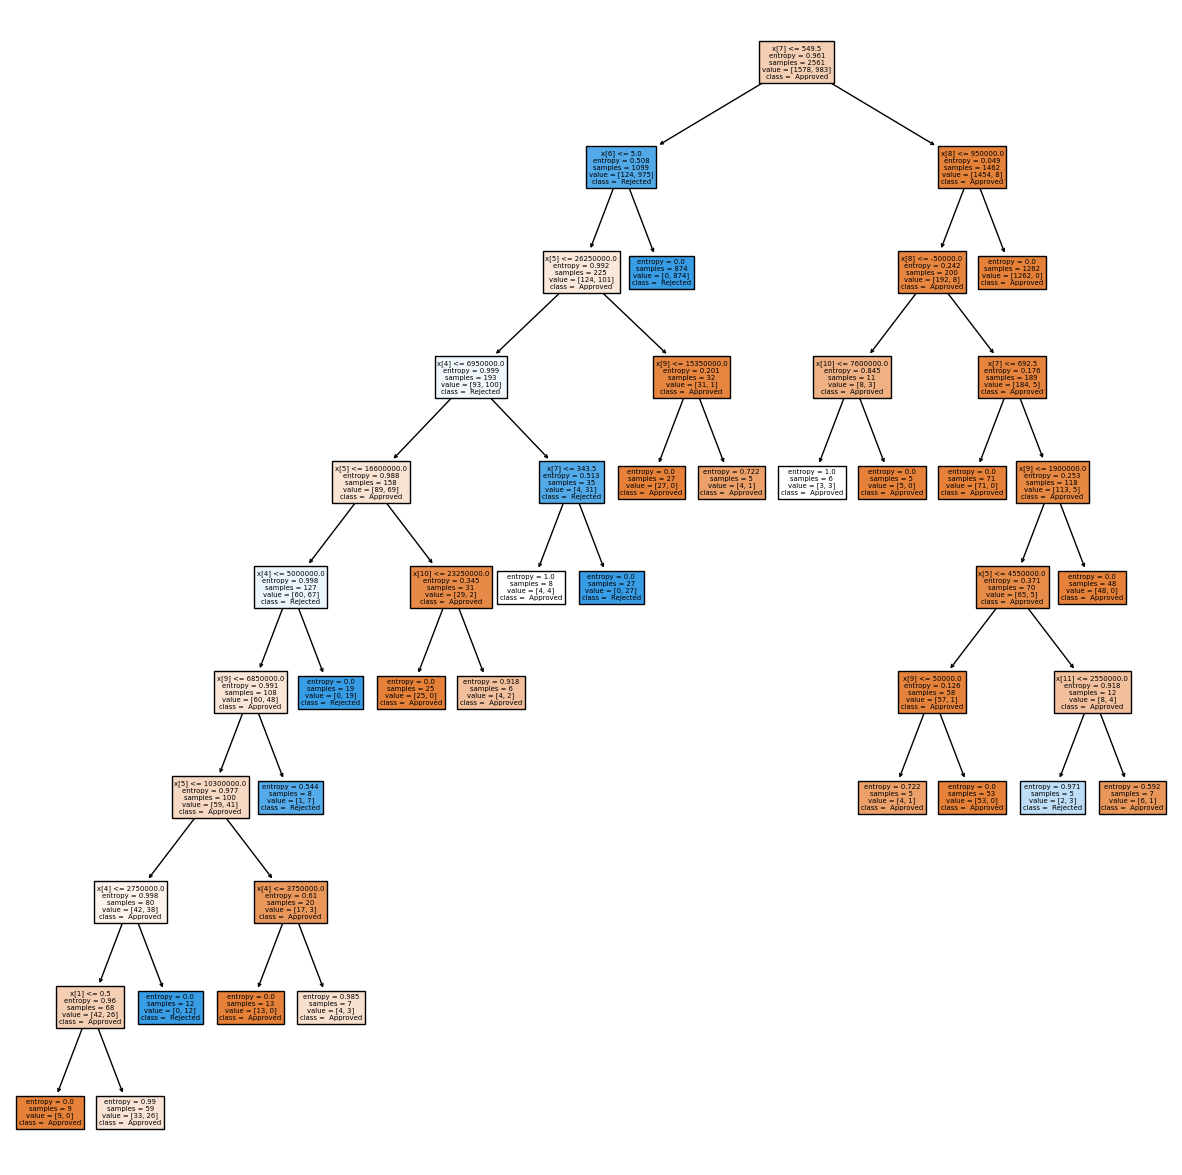

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dt_best,class_names =[' Approved', ' Rejected'], filled=True)
plt.show()

checking if the Model prediction and Actual prediction Matches

In [ ]:
clf = DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
y_pred_test = clf.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_pred_test, columns = ['loan_status_pred'])
df_pred

,loan_status_pred
0,1
1,1
2,0
3,0
4,1
...,...
1703,1
1704,1
1705,1
1706,0


In [ ]:
y_test_actual = pd.DataFrame(y_test,columns = ['loan_status_actual'])
y_test_actual.reset_index(drop=True, inplace=True) #to create dataframe without index
y_test_actual

,loan_status_actual
0,1
1,1
2,0
3,0
4,1
...,...
1703,1
1704,1
1705,1
1706,0


In [ ]:
data = pd.concat([y_test_actual,df_pred],axis=1 ) #concatenating two dataframes
data

,loan_status_actual,loan_status_pred
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
1703,1,1
1704,1,1
1705,1,1
1706,0,0


# Demonstration of Ensemble Techniques - Random Forests

In [ ]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df1.drop("loan_status", axis=1)
y = df1.loan_status    # Selects the last column

# Split into train and test
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
#Train a machine learning model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 30,random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(n_estimators=30, random_state=42))])

In [ ]:
# Model Evaluation
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1086
           1       0.96      0.98      0.97       622

    accuracy                           0.98      1708
   macro avg       0.97      0.98      0.97      1708
weighted avg       0.98      0.98      0.98      1708



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=30, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = rf.predict(X_train)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train_pred, y_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on the testing data
y_test_pred = rf.predict(X_test)

# Calculate and print the testing accuracy
test_accuracy = accuracy_score(y_test_pred, y_test)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9988285825849278
Testing Accuracy: 0.9765807962529274


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_train contains the actual labels for the training set
# and y_train_pred contains the predicted labels for the training set
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train))

# Assuming y_test contains the actual labels for the test set
# and y_test_pred contains the predicted labels for the test set
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1582
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2561
   macro avg       1.00      1.00      1.00      2561
weighted avg       1.00      1.00      1.00      2561


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1074
           1       1.00      1.00      1.00       634

    accuracy                           1.00      1708
   macro avg       1.00      1.00      1.00      1708
weighted avg       1.00      1.00      1.00      1708



Bagging

In [ ]:
# Bagging Classifier
#improve the model performance by increasing n_estimators 50
from sklearn.ensemble import BaggingClassifier

# Create a bagging classifier with the decision tree pipeline
bagging_classifier = BaggingClassifier(base_estimator=pipeline, n_estimators=10, random_state=42)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('classifier',
                                                  RandomForestClassifier(n_estimators=30,
                                                                         random_state=42))]),
                  random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=30, random_state=42)

# Create a BaggingClassifier with the Random Forest model as the base estimator
bagging_rf = BaggingClassifier(base_estimator=pipeline, n_estimators=10, random_state=42)

# Fit the BaggingClassifier to the training data
bagging_rf.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = bagging_rf.predict(X_train)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train_pred, y_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on the testing data
y_test_pred = bagging_rf.predict(X_test)

# Calculate and print the testing accuracy
test_accuracy = accuracy_score(y_test_pred, y_test)
print("Testing Accuracy:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy: 0.9980476376415462
Testing Accuracy: 0.974824355971897


Here we have used the GridSearchCV to check how many percent(%) does it reduces the over fitting..

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
dt = RandomForestClassifier(n_estimators=10, random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=8, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 8 folds for each of 50 candidates, totalling 400 fits
CPU times: user 673 ms, sys: 68.7 ms, total: 741 ms
Wall time: 17.9 s


GridSearchCV(cv=8,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044466,0.003782,0.006677,0.001761,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.931464,0.946875,0.943750,0.98125,0.959375,0.953125,0.962500,0.953125,0.953933,0.013734,43
1,0.044149,0.004222,0.005636,0.001536,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.928349,0.946875,0.943750,0.98125,0.959375,0.953125,0.956250,0.953125,0.952762,0.014052,49
2,0.045266,0.004559,0.005416,0.000334,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.931464,0.946875,0.946875,0.98125,0.959375,0.953125,0.953125,0.946875,0.952371,0.013285,50
3,0.045098,0.009443,0.005925,0.001774,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.931464,0.943750,0.943750,0.98125,0.965625,0.962500,0.956250,0.946875,0.953933,0.014679,43
4,0.044421,0.002611,0.005901,0.001871,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.931464,0.950000,0.943750,0.98125,0.962500,0.975000,0.962500,0.956250,0.957839,0.015183,34


In [ ]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
40,0.061832,0.007945,0.005244,0.000223,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.981308,0.984375,0.965625,0.978125,0.984375,0.981250,0.978125,0.962500,0.976960,0.007807,1
45,0.058175,0.002397,0.005371,0.000275,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.971963,0.978125,0.965625,0.978125,0.975000,0.987500,0.981250,0.968750,0.975792,0.006576,2
46,0.058829,0.004181,0.005174,0.000372,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.965732,0.975000,0.965625,0.981250,0.978125,0.996875,0.968750,0.965625,0.974623,0.010167,3
41,0.056733,0.001504,0.004973,0.000116,entropy,10,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.965732,0.971875,0.965625,0.987500,0.968750,0.996875,0.968750,0.965625,0.973842,0.011032,4
15,0.097868,0.021697,0.008528,0.003248,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.968847,0.971875,0.959375,0.978125,0.971875,0.987500,0.981250,0.956250,0.971887,0.009878,5


In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.9894572432643499
Train Confusion Matrix:
[[1573    9]
 [  18  961]]
--------------------------------------------------
Test Accuracy : 0.9765807962529274
Test Confusion Matrix:
[[1053   21]
 [  19  615]]
